<a href="https://colab.research.google.com/github/dpereiraalonso/08MBID---Visualizacion-de-Datos/blob/main/Visualizaci%C3%B3nDatos_Actividad_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Se importan los módulos necesarios
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [7]:
#Cargar el dataset desde github
#Se carga y se guarda en un Dataframe de pandas
url="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
s=requests.get(url).content
titanic=pd.read_csv(io.StringIO(s.decode('utf-8')))
titanic


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [8]:
#Información del Dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [9]:
# Renombrar columnas
titanic.rename(columns={'class':'clase'},inplace=True)
titanic.rename(columns={'fare':'tarifa'},inplace=True)

# Mostrar valores unicos (clases)
titanic.clase.unique()

# Primeras 5 filas
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
# Añadir columna is_old, is_baby
def is_old_func(row):
  return row['age'] > 60

titanic['is_old'] = titanic.apply(is_old_func, axis='columns')
titanic.eval( ' is_baby = age < 15' , inplace = True)

In [11]:
# Columna class_num
def class_num_func(row):
  Clase={'Third':3,'First':1,'Second':2}
  return Clase[row.clase]

titanic['class_num'] = titanic.apply(class_num_func, axis='columns')

In [12]:
# Imprimir
titanic.head()

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,False,False,3
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,False,False,1
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,False,False,3
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,False,False,1
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,False,False,3


In [13]:
# Query
titanic[(titanic.sex == 'female') & (titanic['clase'].isin(['First','Third'])) & (titanic.age > 45) & (titanic.survived == 0)]

,survived,pclass,sex,age,sibsp,parch,tarifa,embarked,clase,who,adult_male,deck,embark_town,alive,alone,is_old,is_baby,class_num
132,0,3,female,47.0,1,0,14.5000,S,Third,woman,False,NaN,Southampton,no,False,False,False,3
177,0,1,female,50.0,0,0,28.7125,C,First,woman,False,C,Cherbourg,no,True,False,False,1
736,0,3,female,48.0,1,3,34.3750,S,Third,woman,False,NaN,Southampton,no,False,False,False,3


<Axes: xlabel='pclass', ylabel='count'>

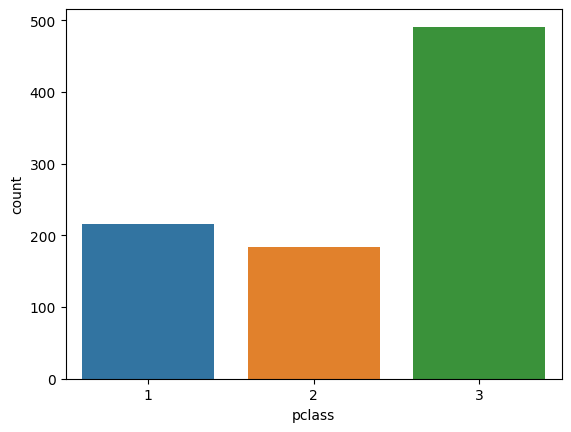

In [14]:
# Distribucion de la variable clase
sns.countplot(x="pclass", data=titanic)

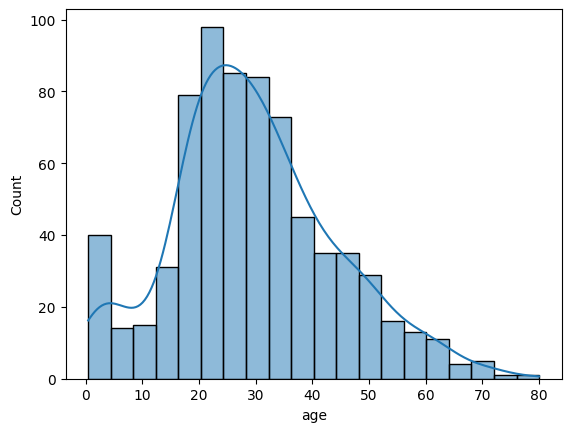

In [15]:
# Distribucion basado en histogramas por la edad
sns.histplot(titanic.age.dropna(), kde=True)
plt.show()

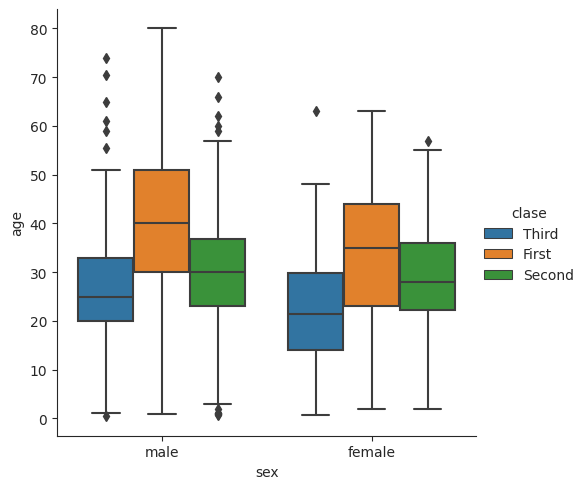

In [16]:
# Boxplot edad vs sexo
with sns.axes_style(style='ticks'):
  ax = sns.catplot(data=titanic, x="sex", y="age", hue="clase", kind="box")

Como se puede observar, aparecen arriba diferentes "rombos", que serían outliers. Por lo tanto, esos outliers hay que ver si hay que tratarlos o no dependiendo de lo que nos interese analizar. 

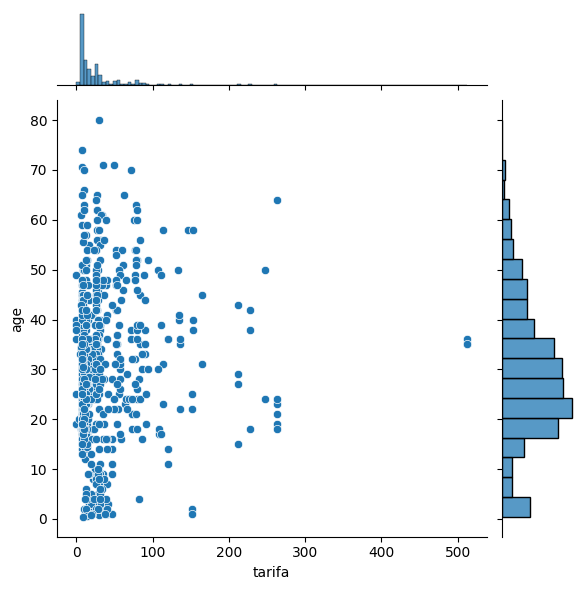

In [17]:
# Distribucion cruzada
sns.jointplot(x="tarifa", y="age", data=titanic)

Se puede observar como hay dos puntos que aparecen en la parte de "tarifa" superior a 500. Esos puntos podrían ser outliers o por otra parte, podrían ser personas que han pagado un camarote muy exclusivo. Las barras exteriores, nos muestran las ditribuciones, tanto de los datos de tarifas como los de la edad.

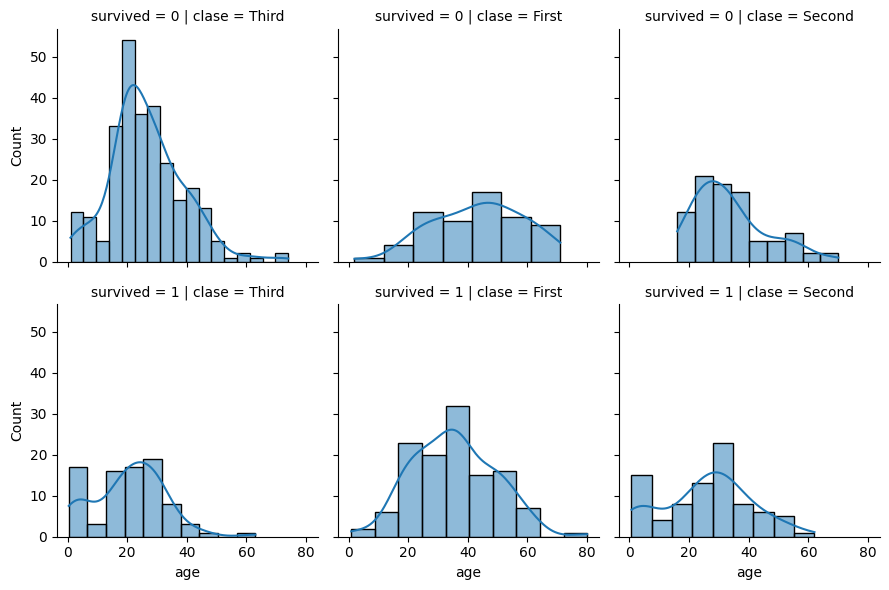

In [18]:
# Matriz de gráficos
g = sns.FacetGrid(titanic, row='survived',col='clase')
g.map(sns.histplot, "age", kde=True)
plt.show()

Si se compara los que han sibrevivido las personas de tercera clase frente a las que han muerto, se puede ver que en tercera clase no habñia muchas personas mayores. Las que más han sobrevivido, son las personas con pocos años como bebés o adolescentes. Con las gráficas anteriores es un poco lo que se intenta comparar.
Por ejemplo, en segunda clase, tanto los que más sobreviven como los que fallecen están comprendido entre los veinte y los treita años.

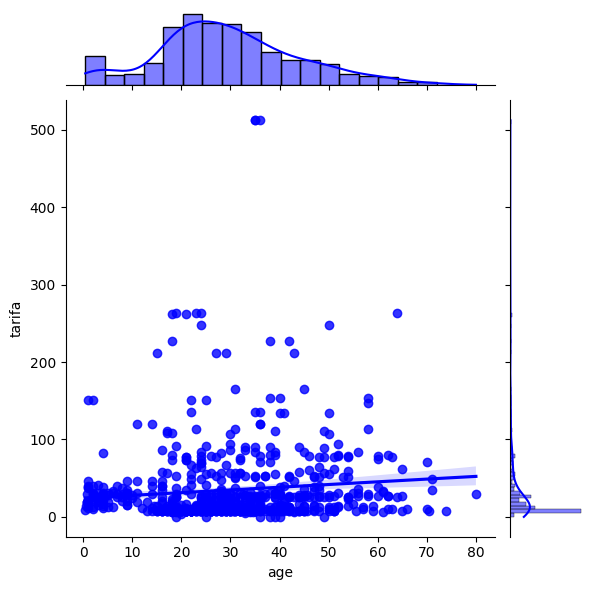

In [19]:
# Diamagra de dispersión
sns.jointplot(data=titanic, x='age', y='tarifa', kind='reg', color='b')
plt.show()

In [ ]:
# Diagrama de correlaciones

tc = titanic.corr()

sns.heatmap(tc,cmap='coolwarm')

plt.title('titanic.corr()')

Por qué la edad está relacionada con el is_old, y con el is_baby No se puede hacer una correlación en crudo porque hay que hacer un preprocesamiento y limpiar los datos ya que puede haber datos 